In [3]:
import tensorflow as tf
import pickle
from utils.ResidualAttentionNetwork import ResidualAttentionNetwork
from matplotlib import pyplot as plt

In [4]:
cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True,
                                                          validation_split=0.2)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train - x_train.mean()
x_test = x_test - x_test.mean()

datagen.fit(x_train)

input_shape = x_train.shape[1:]
output_size = 100

169009152/169001437 [==============================] - 5s 0us/step


In [5]:
"""
:dataset: Cifar100
:model Attention-56 with pre-activation Residual Unit, Attention Residual Learning
:param optimizer: Adam
:param batch_size = 64
:param epochs = 200
"""
model = ResidualAttentionNetwork(input_shape=input_shape, output_size=output_size).Attention_56()
model.compile(tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

callback_accuracy = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
                    epochs=200, callbacks=[callback_accuracy])

Epoch 1/200
625/625 [==============================] - 48s 58ms/step - loss: 4.2358 - accuracy: 0.0532 - val_loss: 5.1285 - val_accuracy: 0.0576
Epoch 2/200
625/625 [==============================] - 35s 55ms/step - loss: 3.8115 - accuracy: 0.1051 - val_loss: 3.9429 - val_accuracy: 0.1046
Epoch 3/200
625/625 [==============================] - 35s 55ms/step - loss: 3.6020 - accuracy: 0.1341 - val_loss: 3.6495 - val_accuracy: 0.1431
Epoch 4/200
625/625 [==============================] - 34s 55ms/step - loss: 3.4857 - accuracy: 0.1587 - val_loss: 4.6426 - val_accuracy: 0.0904
Epoch 5/200
625/625 [==============================] - 35s 55ms/step - loss: 3.3984 - accuracy: 0.1697 - val_loss: 3.9690 - val_accuracy: 0.1237
Epoch 6/200
625/625 [==============================] - 34s 55ms/step - loss: 3.3062 - accuracy: 0.1874 - val_loss: 3.3840 - val_accuracy: 0.1747
Epoch 7/200
625/625 [==============================] - 34s 55ms/step - loss: 3.2498 - accuracy: 0.2001 - val_loss: 3.4477 - val_ac

In [19]:
history7 = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
                    epochs=40, callbacks=[callback_accuracy])

Epoch 1/40
625/625 [==============================] - 36s 57ms/step - loss: 1.2857 - accuracy: 0.6227 - val_loss: 1.9319 - val_accuracy: 0.4981
Epoch 2/40
625/625 [==============================] - 35s 56ms/step - loss: 1.2902 - accuracy: 0.6206 - val_loss: 2.0577 - val_accuracy: 0.4789
Epoch 3/40
625/625 [==============================] - 35s 56ms/step - loss: 1.2872 - accuracy: 0.6225 - val_loss: 1.9791 - val_accuracy: 0.4916
Epoch 4/40
625/625 [==============================] - 35s 57ms/step - loss: 1.2880 - accuracy: 0.6208 - val_loss: 2.0460 - val_accuracy: 0.4844
Epoch 5/40
625/625 [==============================] - 35s 56ms/step - loss: 1.2978 - accuracy: 0.6226 - val_loss: 1.9300 - val_accuracy: 0.4907
Epoch 6/40
625/625 [==============================] - 35s 56ms/step - loss: 1.2798 - accuracy: 0.6260 - val_loss: 2.1493 - val_accuracy: 0.4612
Epoch 7/40
625/625 [==============================] - 35s 55ms/step - loss: 1.2780 - accuracy: 0.6247 - val_loss: 1.9093 - val_accuracy:

In [33]:
#to avoid browser crashing, we deleted some of the training cells, the model can be found in the folder. 
#output result as follows
flatten = lambda t: [item for sublist in t for item in sublist]

history_list = [history.history, history2.history, history3.history, history4.history, history6.history]
history_dict = {}
for k in history.history.keys():
  history_dict[k] = list(history_dict[k] for history_dict in history_list)

accuracy = flatten(history_dict['accuracy'])
loss = flatten(history_dict['loss'])
val_accuracy = flatten(history_dict['val_accuracy'])
val_loss = flatten(history_dict['val_loss'])

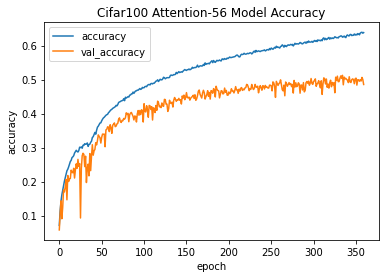

In [34]:
plt.plot(accuracy)
plt.plot(val_accuracy)

plt.title('Cifar100 Attention-56 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

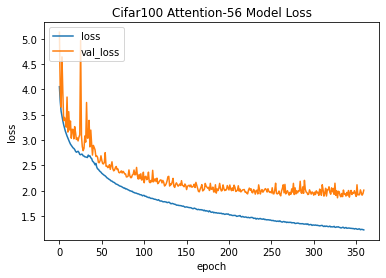

In [35]:
plt.plot(loss)
plt.plot(val_loss)

plt.title('Cifar100 Attention-56 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()